In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/content/melb_data.csv")

In [4]:
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Car              0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

In [5]:
data.shape

(34857, 13)

In [6]:
data.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.03,0.97,1.0,2.0,3.0,4.0,16.0
Distance,34857.0,11.18,6.79,0.0,6.4,10.3,14.0,48.1
Postcode,34857.0,3116.06,109.02,3000.0,3051.0,3103.0,3156.0,3978.0
Car,34857.0,1.80,0.88,0.0,1.0,2.0,2.0,26.0
Propertycount,34857.0,7572.82,4427.91,83.0,4385.0,6763.0,10412.0,21650.0


In [9]:
# for selection only int and float values
py_num_dt = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [11]:
# filter coln according to data types
numeric_coln = list(data.select_dtypes(include=py_num_dt).columns)

In [12]:
numeric_coln

['Rooms', 'Distance', 'Postcode', 'Car', 'Propertycount']

In [13]:
# creating dataframe that only contain numeric columns
clean_numeric_data = data[numeric_coln]

In [14]:
clean_numeric_data.head()

,Rooms,Distance,Postcode,Car,Propertycount
0,2,2.5,3067.0,1.0,4019.0
1,2,2.5,3067.0,1.0,4019.0
2,2,2.5,3067.0,0.0,4019.0
3,3,2.5,3067.0,1.0,4019.0
4,3,2.5,3067.0,0.0,4019.0


In [15]:
clean_numeric_data.sample(10)

,Rooms,Distance,Postcode,Car,Propertycount
28153,4,20.5,3752.0,2.0,7969.0
19404,6,14.3,3109.0,2.0,10999.0
9057,3,11.4,3084.0,2.0,3540.0
2128,4,10.7,3187.0,2.0,6938.0
31209,4,18.0,3037.0,2.0,5556.0
4517,4,9.2,3146.0,4.0,10412.0
24052,2,2.7,3141.0,2.0,14887.0
2949,2,11.4,3163.0,1.0,7822.0
350,4,11.1,3025.0,2.0,5132.0
13408,3,9.9,3044.0,2.0,7485.0


In [16]:
# drop postcode column
clean_numeric_data = clean_numeric_data.drop(['Postcode'], axis=1)

In [17]:
clean_numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          34857 non-null  int64  
 1   Distance       34857 non-null  float64
 2   Car            34857 non-null  float64
 3   Propertycount  34857 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 1.1 MB


In [18]:
# find pearson correlation
pearson_corr = clean_numeric_data.corr(method='pearson')
pearson_corr

,Rooms,Distance,Car,Propertycount
Rooms,1.000000,0.271511,0.317095,-0.071664
Distance,0.271511,1.000000,0.204163,-0.018132
Car,0.317095,0.204163,1.000000,-0.005168
Propertycount,-0.071664,-0.018132,-0.005168,1.000000


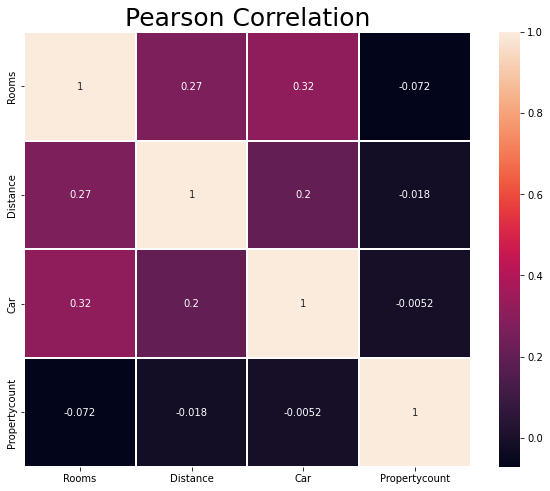

In [20]:
# heatmap shows of correlated features using Pearson technique.
plt.figure(figsize=(10,8))

sns.heatmap(pearson_corr, linewidth=1, annot=True, annot_kws={'size' : 10})
plt.title("Pearson Correlation", fontsize=25)
plt.show()

In [21]:
# find spearman correlation
spearman_corr = clean_numeric_data.corr(method='spearman')
spearman_corr

,Rooms,Distance,Car,Propertycount
Rooms,1.000000,0.332934,0.356351,-0.062112
Distance,0.332934,1.000000,0.249843,-0.086028
Car,0.356351,0.249843,1.000000,-0.013528
Propertycount,-0.062112,-0.086028,-0.013528,1.000000


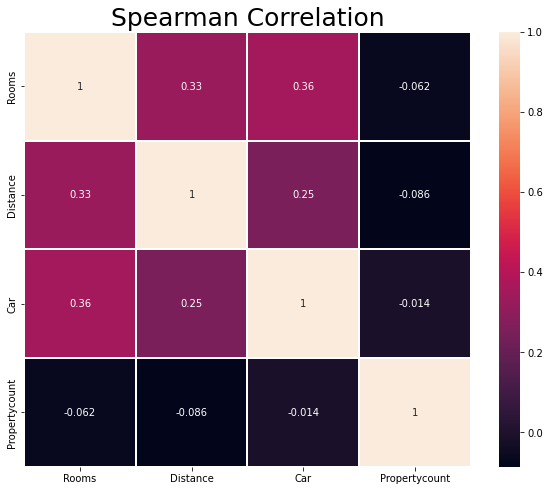

In [22]:
# heatmap shows of correlated features using Spearman technique.
plt.figure(figsize=(10,8))

sns.heatmap(spearman_corr, linewidth=1, annot=True, annot_kws={'size' : 10})
plt.title("Spearman Correlation", fontsize=25)
plt.show()

In [23]:
# find kendall_corr correlation
kendall_corr = clean_numeric_data.corr(method='kendall')
kendall_corr

,Rooms,Distance,Car,Propertycount
Rooms,1.000000,0.252756,0.314126,-0.046728
Distance,0.252756,1.000000,0.195548,-0.064033
Car,0.314126,0.195548,1.000000,-0.010551
Propertycount,-0.046728,-0.064033,-0.010551,1.000000


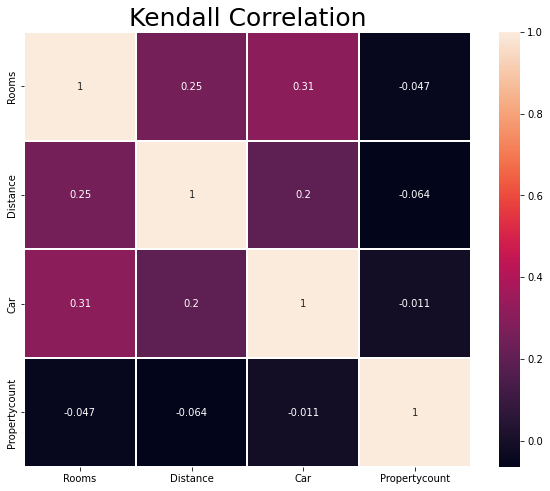

In [24]:
# heatmap shows of correlated features using Kendall technique.
plt.figure(figsize=(10,8))

sns.heatmap(kendall_corr, linewidth=1, annot=True, annot_kws={'size' : 10})
plt.title("Kendall Correlation", fontsize=25)
plt.show()